# Download Files Needed

Run the following 2 code cells to download and unzip the required data. \
You do not have to change anything in these 2 cells.

In [1]:
import requests

filename = 'data-week-12.zip'
url = f'https://d17lzt44idt8rf.cloudfront.net/{filename}'
response = requests.get(url)

# Make sure the request was successful
if response.status_code == 200:

  # Write the content to a file
  with open(filename, 'wb') as f:
      f.write(response.content)

In [2]:
!unzip $filename

Archive:  data-week-12.zip
   creating: 00_raw_data/
  inflating: 00_raw_data/hdb_block_info.xlsx  
  inflating: 00_raw_data/hdb_facilities_distance.xlsx  
  inflating: 00_raw_data/hdb_resale_basic.xlsx  


# Table of Contents


- [Import Packages & Notebook Configurations](#Import-Packages-&-Notebook-Configurations)
- [Loading Data and Quick Checking](#Loading-Data-and-Quick-Checking)
  - [Loading Data](#Loading-Data)
  - [Quick Checking](#Quick-Checking)
- [Features Engineering](#Features-Engineering)
    - [Using apply() function](#Using-apply()-function)
    - [Using pandas vectorized functions](#Using-pandas-vectorized-functions)
- [Data Wrangling](#Data-Wrangling)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
  - [Correlation](#Correlation)
    - [Breakdown and Understand the Pairplot](#Breakdown-and-Understand-the-Pairplot)
    - [Scatterplot for Visualizing Relationship between 2 Variables](#Scatterplot-for-Visualizing-Relationship-between-2-Variables)
  - [Descriptive Statistics](#Descriptive-Statistics)
- [Modeling with Linear Regression](#Modeling-with-Linear-Regression)
  - [Model Selection](#Model-Selection)
  - [Separating Train and Test Data sets](#Separating-Train-and-Test-Data-sets)
    - [Key Step 1: Instantiate the Model](#Key-Step-1:-Instantiate-the-Model)
    - [Key Step 2: Train the Model](#Key-Step-2:-Train-the-Model)
    - [Key Step 3: Predict based on new inputs](#Key-Step-3:-Predict-based-on-new-inputs)
    - [Key Step 4 (New): Validate the the Predicted Values](#Key-Step-4-(New):-Validate-the-the-Predicted-Values)
    - [Key 5 (New): Understand the Predictors](#Key-5-(New):-Understand-the-Predictors)
- [Example of Model Deployment](#Example-of-Model-Deployment)
- [More Hands-on Practices: Build More Models](#More-Hands-on-Practices:-Build-More-Models)
  - [Model B](#Model-B)
  - [Model C](#Model-C)

# Import Packages & Notebook Configurations

In [3]:
import pandas as pd
import numpy as np

In [4]:
# Settings for Matplotlib (& Seaborn)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import libraries for charting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of charts
plt.rc('figure', figsize=(16,9))
sns.set_context(context={'figure.figsize': (16,9)})

![ml_workflow](https://i.imgur.com/xf43rGO.png)

---

# Loading Data and Quick Checking

## Loading Data

In [5]:
df_hdb = pd.read_excel('00_raw_data/hdb_resale_basic.xlsx')

In [6]:
df_fac = pd.read_excel('00_raw_data/hdb_facilities_distance.xlsx')

## Quick Checking

In [7]:
df_hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185968 entries, 0 to 185967
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Tranc_YearMonth      185968 non-null  object 
 1   Tranc_Year           185968 non-null  int64  
 2   Tranc_Month          185968 non-null  int64  
 3   town                 185968 non-null  object 
 4   flat_type            185968 non-null  object 
 5   block                185968 non-null  object 
 6   street_name          185968 non-null  object 
 7   storey_range         185968 non-null  object 
 8   floor_area_sqm       185968 non-null  float64
 9   flat_model           185968 non-null  object 
 10  lease_commence_date  185968 non-null  int64  
 11  resale_price         185968 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 17.0+ MB


In [8]:
df_fac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9175 entries, 0 to 9174
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   address                  9175 non-null   object 
 1   Mall_Nearest_Distance    9030 non-null   float64
 2   Mall_Within_500m         3596 non-null   float64
 3   Mall_Within_1km          7483 non-null   float64
 4   Mall_Within_2km          8947 non-null   float64
 5   Hawker_Nearest_Distance  9175 non-null   float64
 6   Hawker_Within_500m       2992 non-null   float64
 7   Hawker_Within_1km        5349 non-null   float64
 8   Hawker_Within_2km        7414 non-null   float64
 9   hawker_food_stalls       9175 non-null   int64  
 10  hawker_market_stalls     9175 non-null   int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 788.6+ KB


In [9]:
# Quick Stats for Numerical Columns
df_fac.describe()

,Mall_Nearest_Distance,Mall_Within_500m,Mall_Within_1km,Mall_Within_2km,Hawker_Nearest_Distance,Hawker_Within_500m,Hawker_Within_1km,Hawker_Within_2km,hawker_food_stalls,hawker_market_stalls
count,9030.000000,3596.000000,7483.000000,8947.000000,9175.000000,2992.000000,5349.000000,7414.000000,9175.000000,9175.000000
mean,664.481724,1.288932,2.166778,5.281882,1184.636183,1.366644,2.259675,4.554222,48.739837,56.103215
std,382.772702,0.643530,1.334262,3.532341,1058.489663,0.654892,1.600901,3.946897,19.330713,55.366877
min,0.000000,1.000000,1.000000,1.000000,1.873295,1.000000,1.000000,1.000000,0.000000,0.000000
25%,381.642832,1.000000,1.000000,3.000000,393.555833,1.000000,1.000000,1.000000,40.000000,0.000000
50%,592.244848,1.000000,2.000000,5.000000,821.921578,1.000000,2.000000,3.000000,43.000000,45.000000
75%,876.309735,1.000000,3.000000,6.000000,1665.993065,2.000000,3.000000,8.000000,60.000000,95.000000
max,3496.402910,6.000000,15.000000,43.000000,4907.036414,5.000000,9.000000,19.000000,226.000000,477.000000


In [10]:
# Check Categorical Columns
df_hdb['town'].value_counts(normalize=True)

JURONG WEST        0.076099
WOODLANDS          0.074981
SENGKANG           0.073626
TAMPINES           0.069576
YISHUN             0.066146
BEDOK              0.059838
PUNGGOL            0.051702
HOUGANG            0.049783
ANG MO KIO         0.046573
CHOA CHU KANG      0.042244
BUKIT MERAH        0.038862
BUKIT PANJANG      0.037797
BUKIT BATOK        0.037668
TOA PAYOH          0.032086
PASIR RIS          0.031995
KALLANG/WHAMPOA    0.029026
QUEENSTOWN         0.027494
GEYLANG            0.026451
SEMBAWANG          0.024585
CLEMENTI           0.023902
JURONG EAST        0.022633
SERANGOON          0.020821
BISHAN             0.019019
CENTRAL AREA       0.008184
MARINE PARADE      0.006469
BUKIT TIMAH        0.002441
Name: town, dtype: float64

In [11]:
# Check Categorical Columns
df_hdb['Tranc_Year'].value_counts(normalize=True)

2020    0.125505
2019    0.119300
2018    0.115939
2017    0.110282
2012    0.107578
2016    0.104174
2015    0.095608
2013    0.086558
2014    0.086553
2021    0.048503
Name: Tranc_Year, dtype: float64

# Features Engineering

### Using apply() function

In [12]:
def convert_squared_meters_to_feet(row):
    m2_to_feet2 = 10.7639
    unit_floor_area_sqft = row['floor_area_sqm'] * m2_to_feet2
    return round(unit_floor_area_sqft, 2)

In [13]:
df_hdb['floor_area_sqft'] = df_hdb.apply(convert_squared_meters_to_feet, axis=1)

In [14]:
df_hdb = df_hdb.drop('floor_area_sqft', axis=1)

### Using pandas vectorized functions

In [15]:
df_hdb['floor_area_sqft'] = df_hdb['floor_area_sqm'] * 10.7639

# Data Wrangling

🔷**TASK**

Create a new column **price_per_sqft**

In [16]:
df_hdb['price_per_sqft'] = df_hdb['resale_price'] / df_hdb['floor_area_sqft']


🔷**TASK**

Create a new column **flat_type_numerised** in **hdbdf** to store the values based on the mapping given below:

![](_resources/q003d.png)


In [ ]:
def flat_type_to_num(row):
    <..>

df_hdb['flat_type_numerized'] = <..>

In [17]:
def flat_type_to_num(row):
    mapping = {
        '1 ROOM': 1,
        '2 ROOM': 2,
        '3 ROOM': 3,
        '4 ROOM': 4,
        '5 ROOM': 5,
        'EXECUTIVE': 6,
        'MULTI-GENERATION': 7
    }
    return mapping.get(row['flat_type'], 0)

df_hdb['flat_type_numerized'] = df_hdb.apply(flat_type_to_num, axis=1)


🔷**TASK**

Merge both the **df_fac** together **df_hdb**, so everyone record in **df_hdb** will have the corresponding information about the facilities.

Store the merged dataframe as a new variable called **df**.

You may need more than one operation to achieve this.

In [ ]:
def create_address(row):
    <..>

df_hdb['address'] = <..>

In [18]:
def create_address(row):
    address = f"{row['block']}, {row['street_name']}"
    return address

df_hdb['address'] = df_hdb.apply(create_address, axis=1)


In [ ]:
df = <..>

In [19]:
df = pd.merge(df_hdb, df_fac, on='address', how='left')

🔷**TASK**

Filter to records of 2015 and onwards. We will use filtered **df_hdb** for the remaining of this notebook.


In [ ]:
df = <..>

In [21]:
df_filtered = df_hdb[df_hdb['Tranc_Year'] >= 2015]

---

# Exploratory Data Analysis

## Correlation

In [22]:
matrix_corr = df[['Tranc_Year', 'floor_area_sqft', 'flat_type_numerized', 'resale_price', 'price_per_sqft']].corr()
matrix_corr = matrix_corr.reset_index()
matrix_corr

,index,Tranc_Year,floor_area_sqft,flat_type_numerized,resale_price,price_per_sqft
0,Tranc_Year,1.000000,0.021281,0.030415,-0.018628,-0.065753
1,floor_area_sqft,0.021281,1.000000,0.949056,0.655439,-0.183874
2,flat_type_numerized,0.030415,0.949056,1.000000,0.663478,-0.121903
3,resale_price,-0.018628,0.655439,0.663478,1.000000,0.604294
4,price_per_sqft,-0.065753,-0.183874,-0.121903,0.604294,1.000000


In [26]:
numeric_cols = matrix_corr.select_dtypes(include=[np.number]).columns
matrix_corr[numeric_cols] = matrix_corr[numeric_cols].astype(float)

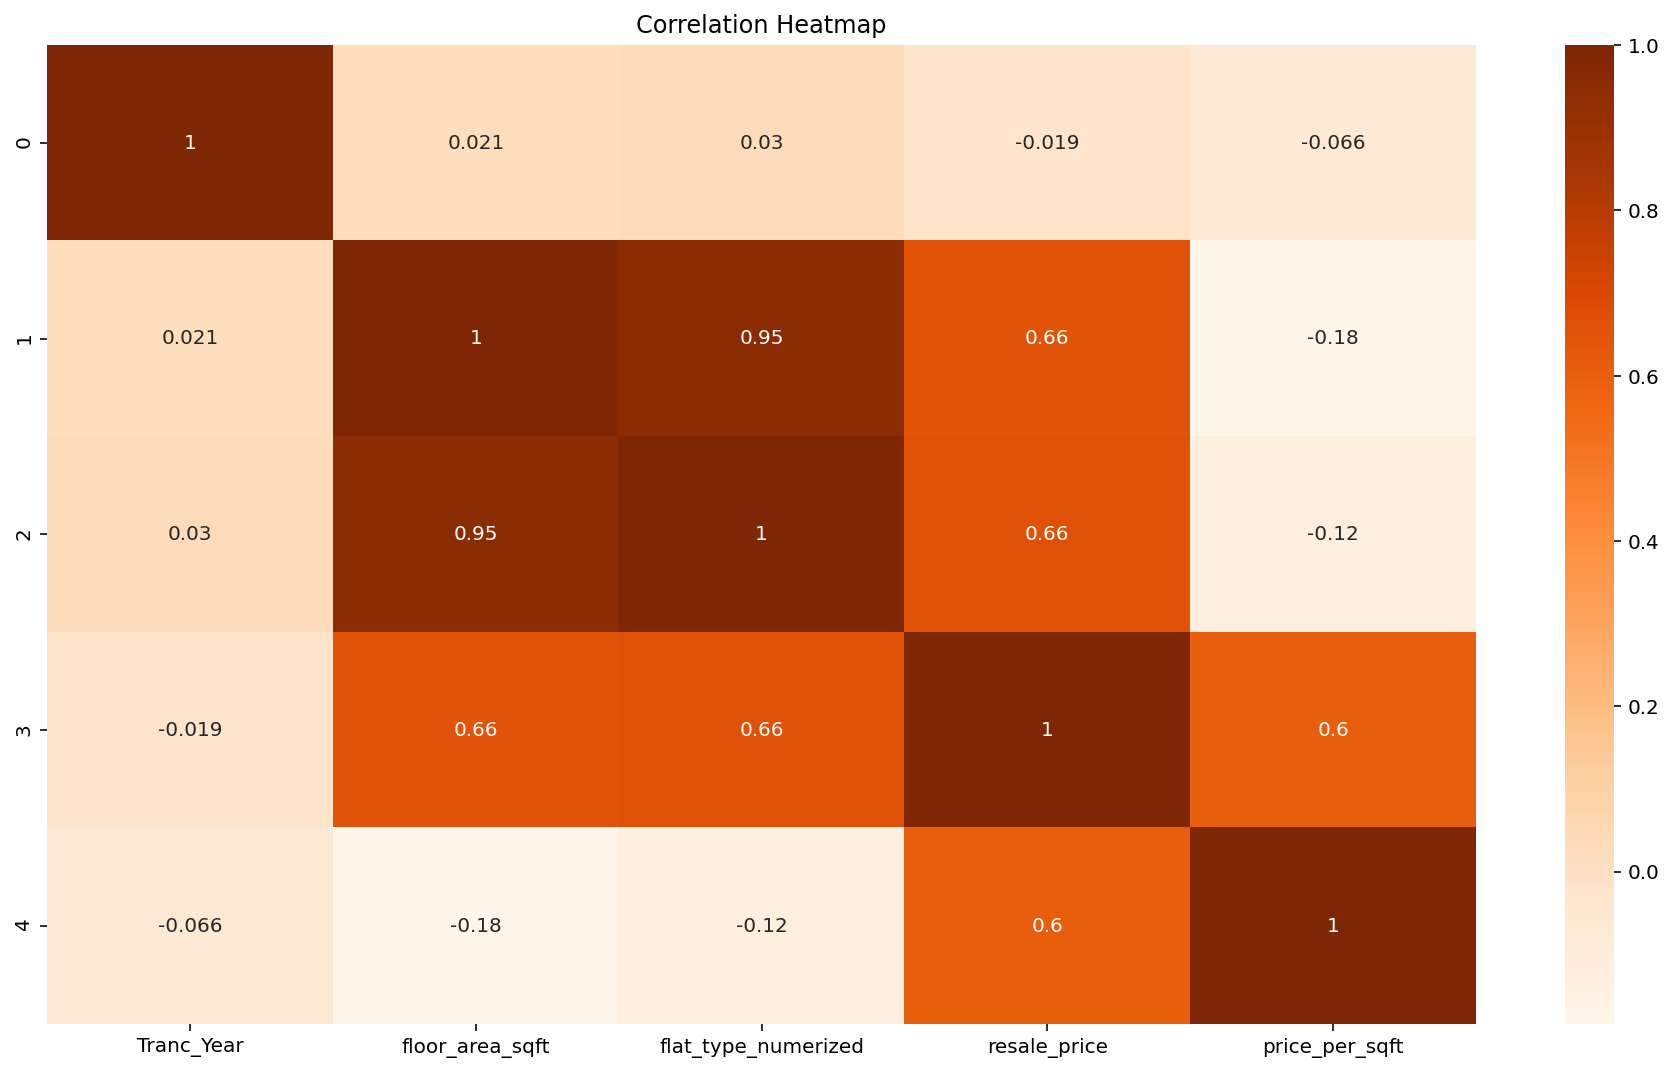

In [29]:
numeric_cols = matrix_corr.select_dtypes(include=[np.number]).columns
matrix_corr_numeric = matrix_corr[numeric_cols].astype(float)

sns.heatmap(matrix_corr_numeric, annot=True, cmap='Oranges')
plt.title('Correlation Heatmap')
plt.show()

### Breakdown and Understand the Pairplot

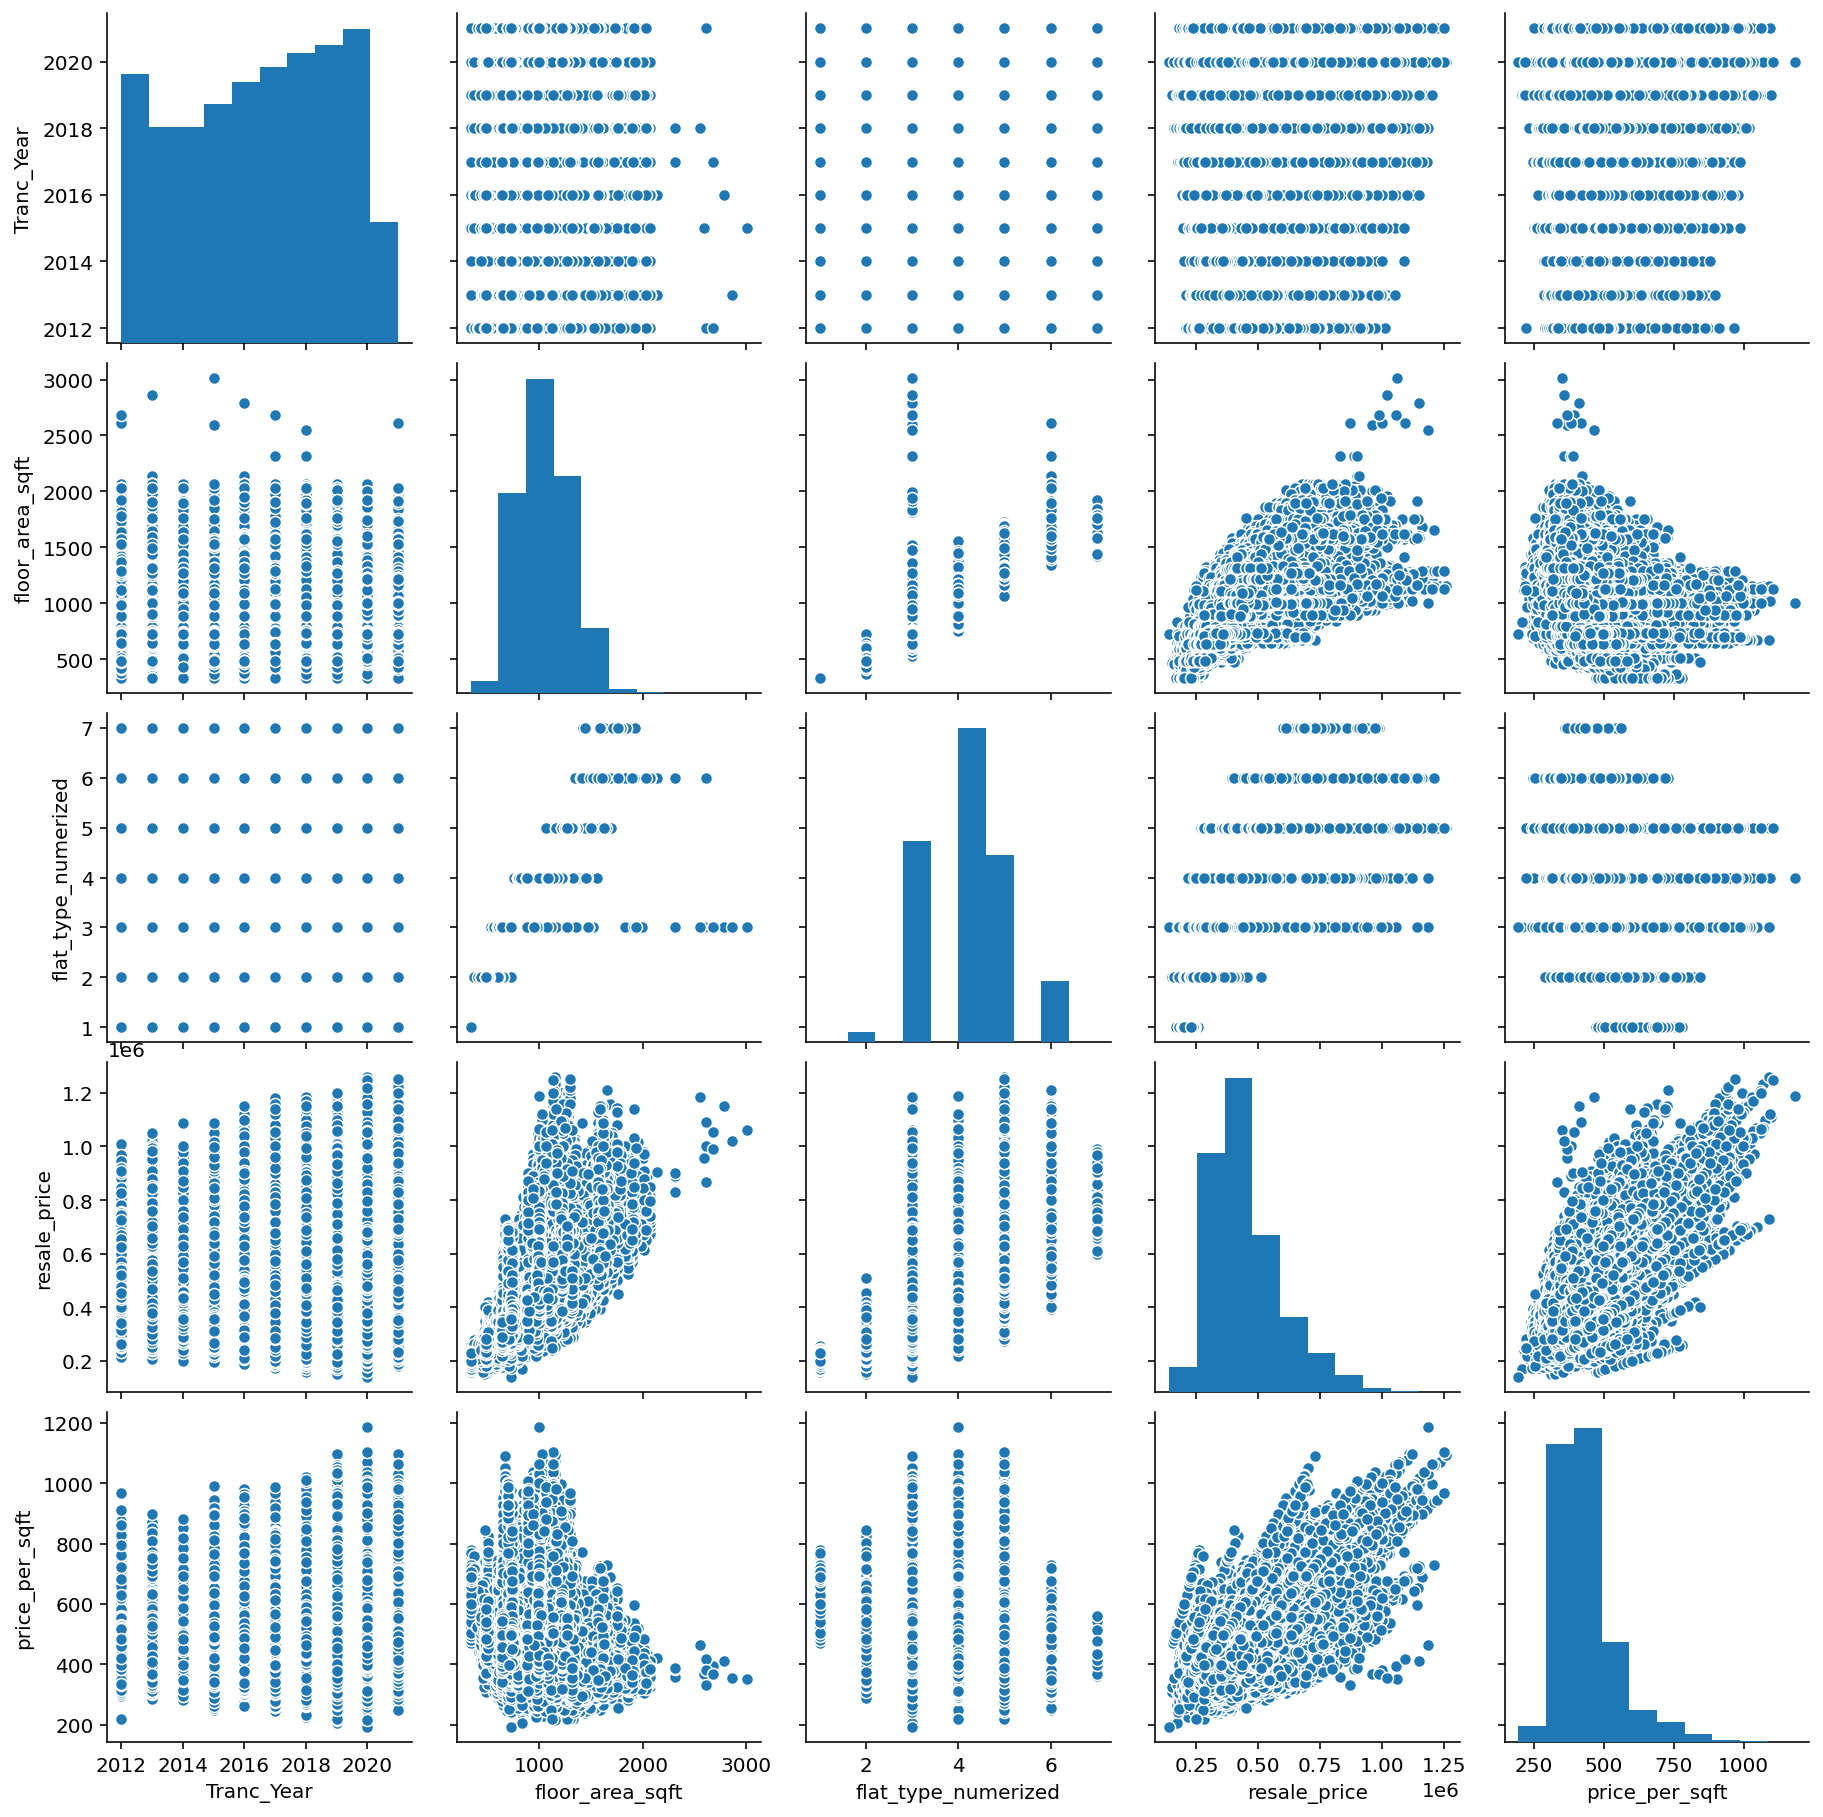

In [30]:
sns.pairplot(df[['Tranc_Year', 'floor_area_sqft', 'flat_type_numerized', 'resale_price', 'price_per_sqft']])

### Scatterplot for Visualizing Relationship between 2 Variables

**NOTE**
- the seaborn's scatterplot can be used to easily visualize 3 dimensions (2 numerical, 1 categorical)
- the parameters 'x' and 'y' for the 2 numerical
- the parameter 'hue' uses the color of the dots to represent the categorical

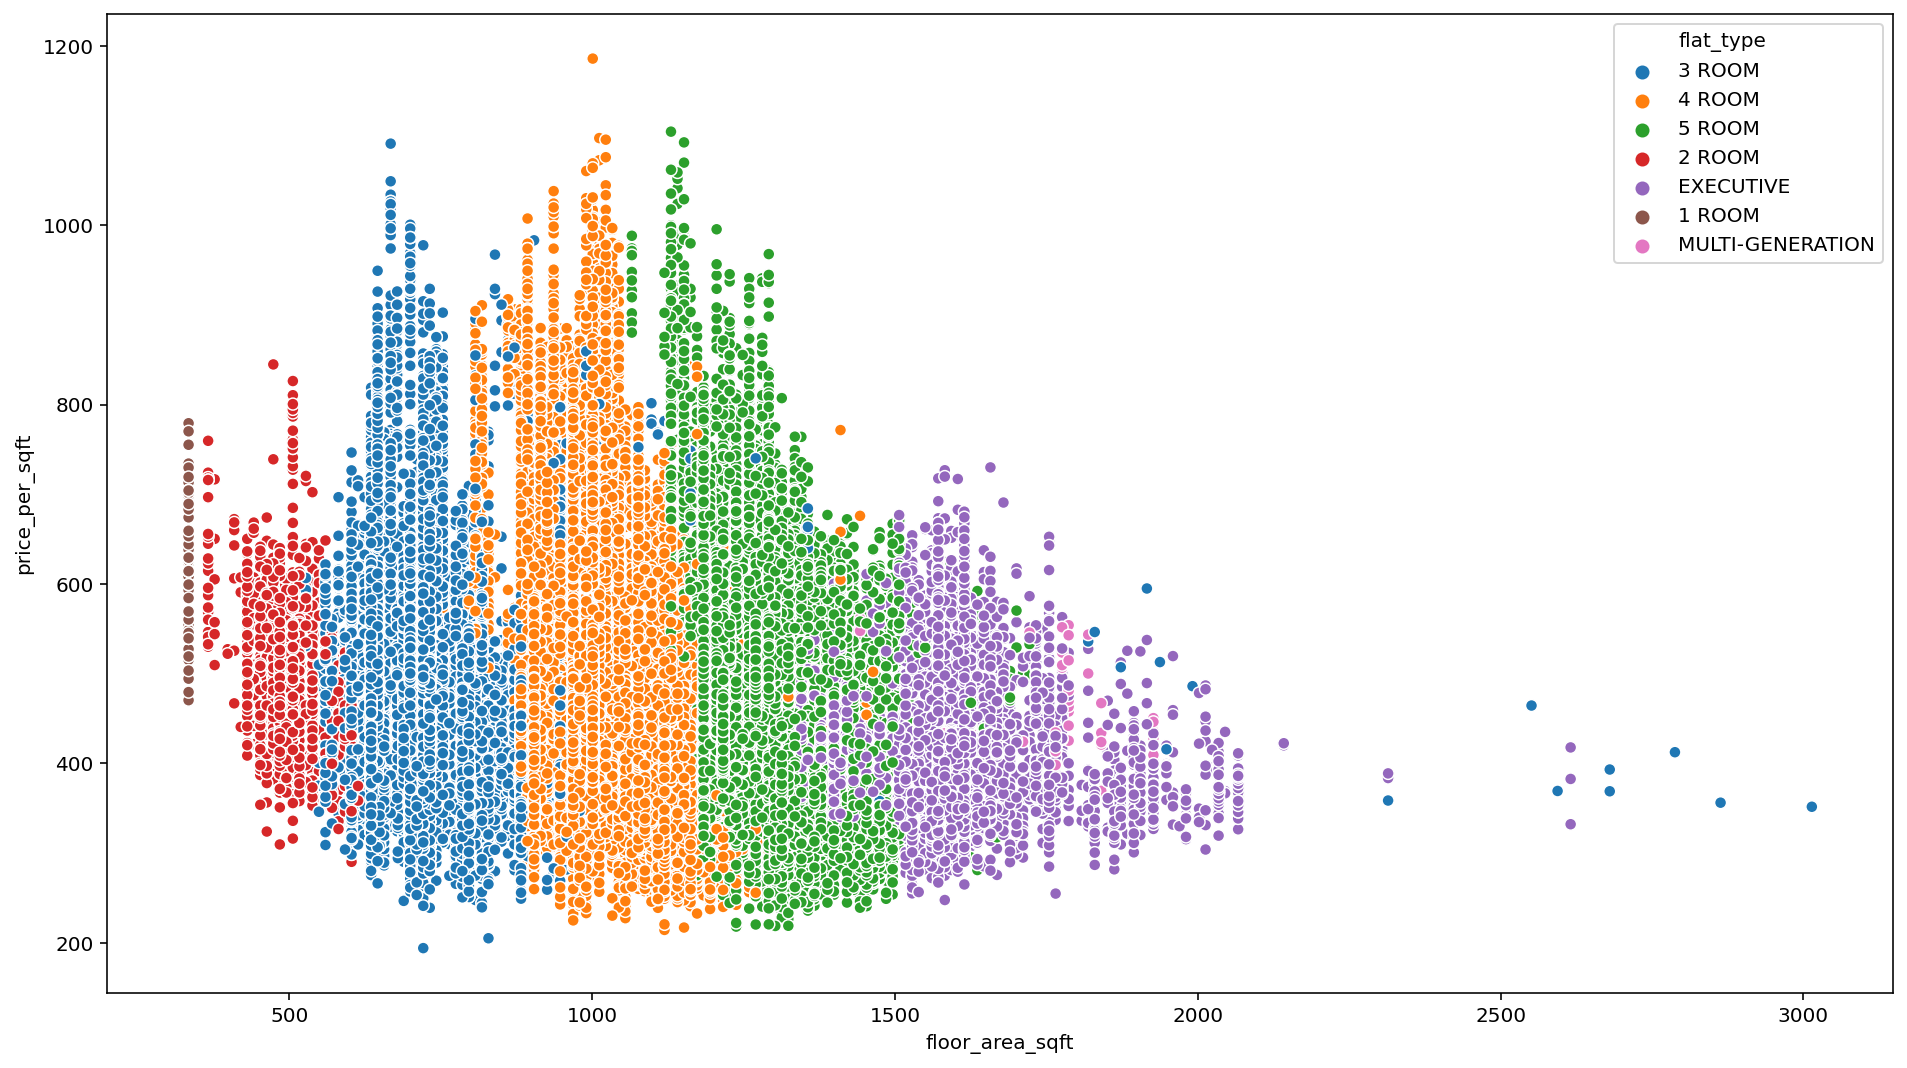

In [31]:
sns.scatterplot(x='floor_area_sqft', y='price_per_sqft', hue='flat_type', data=df)

## Descriptive Statistics

🔷**TASK**

Calculate the average **resale_price** of **4 ROOM** HDB units

In [ ]:
# Average of Height
<..>

In [32]:
average_price = df_filtered[df_filtered['flat_type'] == '4 ROOM']['resale_price'].mean()

🔷**TASK**

Use histogram to display the distribution of **resale_price** of all the **4 ROOM** hdb units.

In [ ]:
<..>

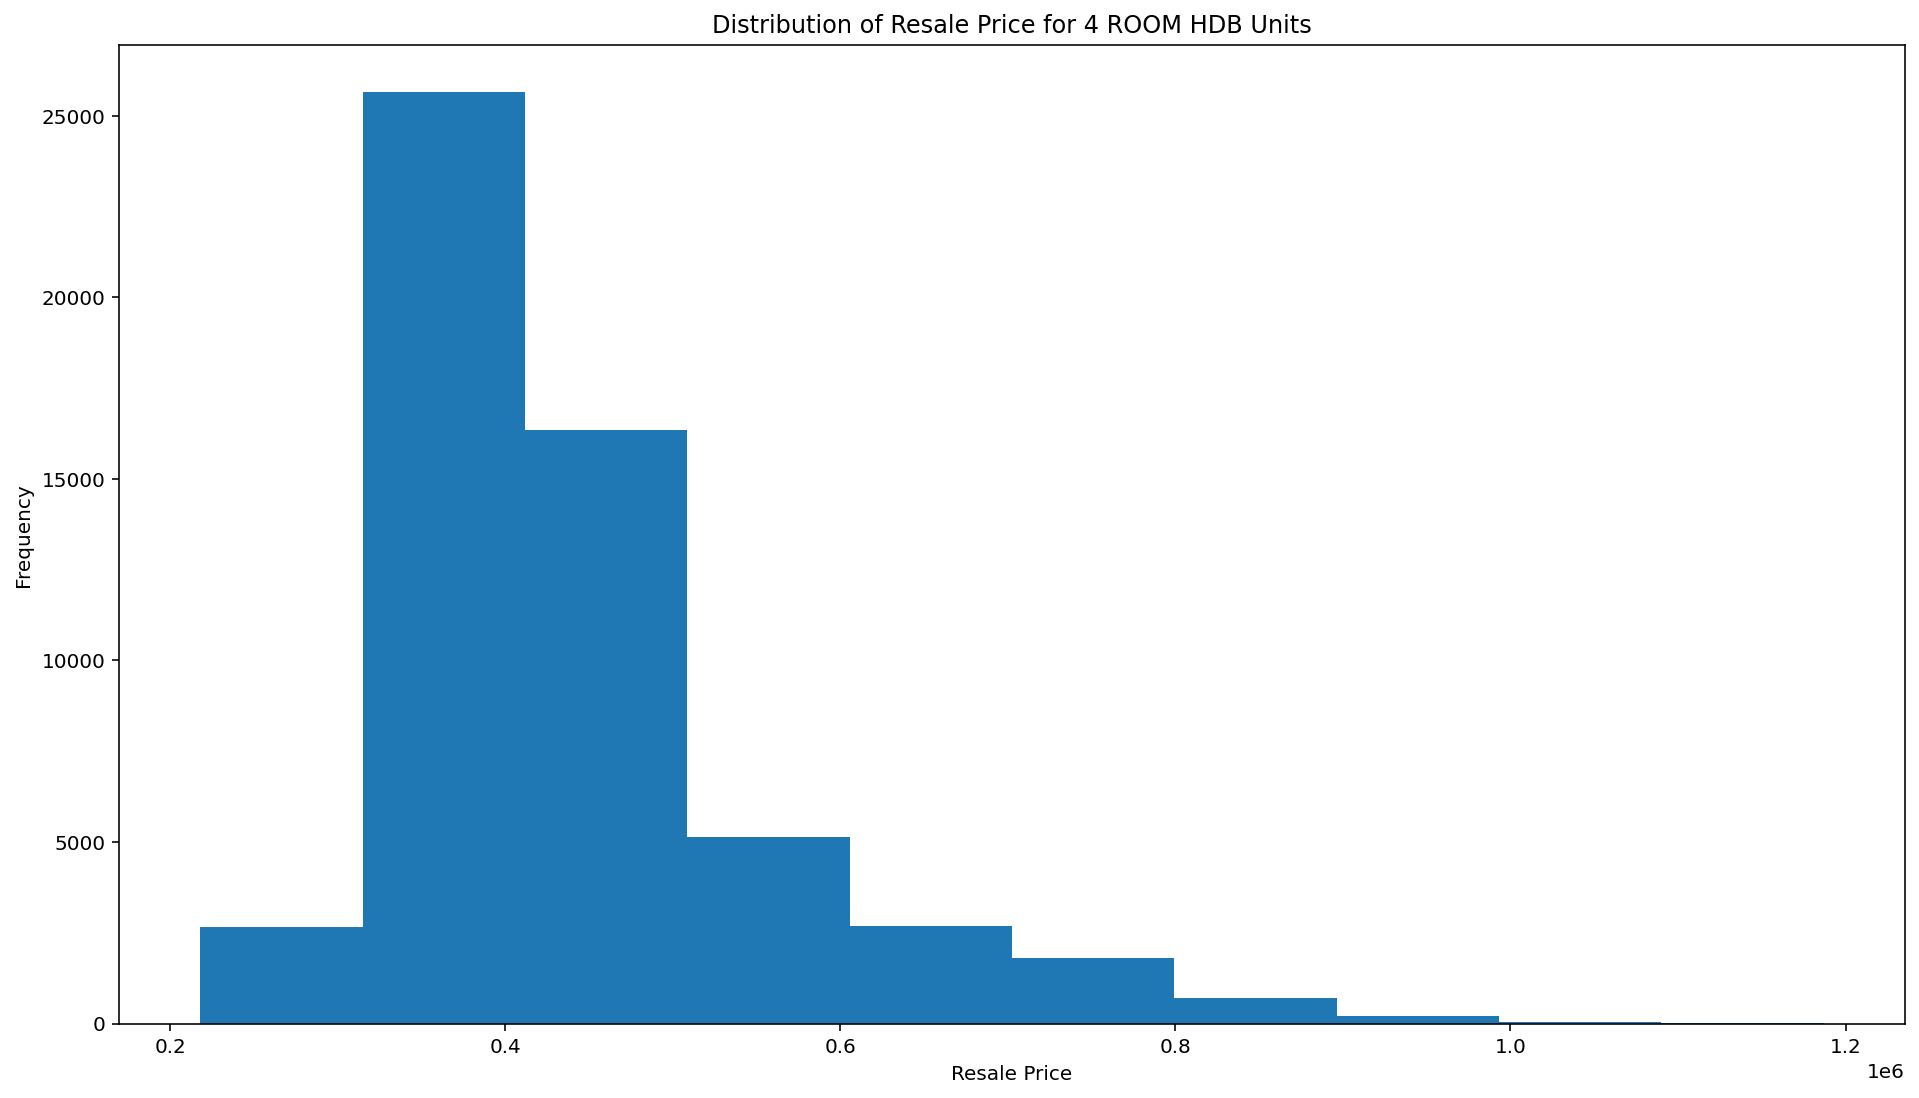

In [33]:
plt.hist(df_filtered[df_filtered['flat_type'] == '4 ROOM']['resale_price'], bins=10)
plt.xlabel('Resale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Resale Price for 4 ROOM HDB Units')
plt.show()

🔷**TASK**

Use Boxplot (in seaborn) to display the distribution of **resale_price** of the **4 ROOM** hdb unit, for each of the **Tranc_Year**.


In [ ]:
sns.boxplot(<..>)

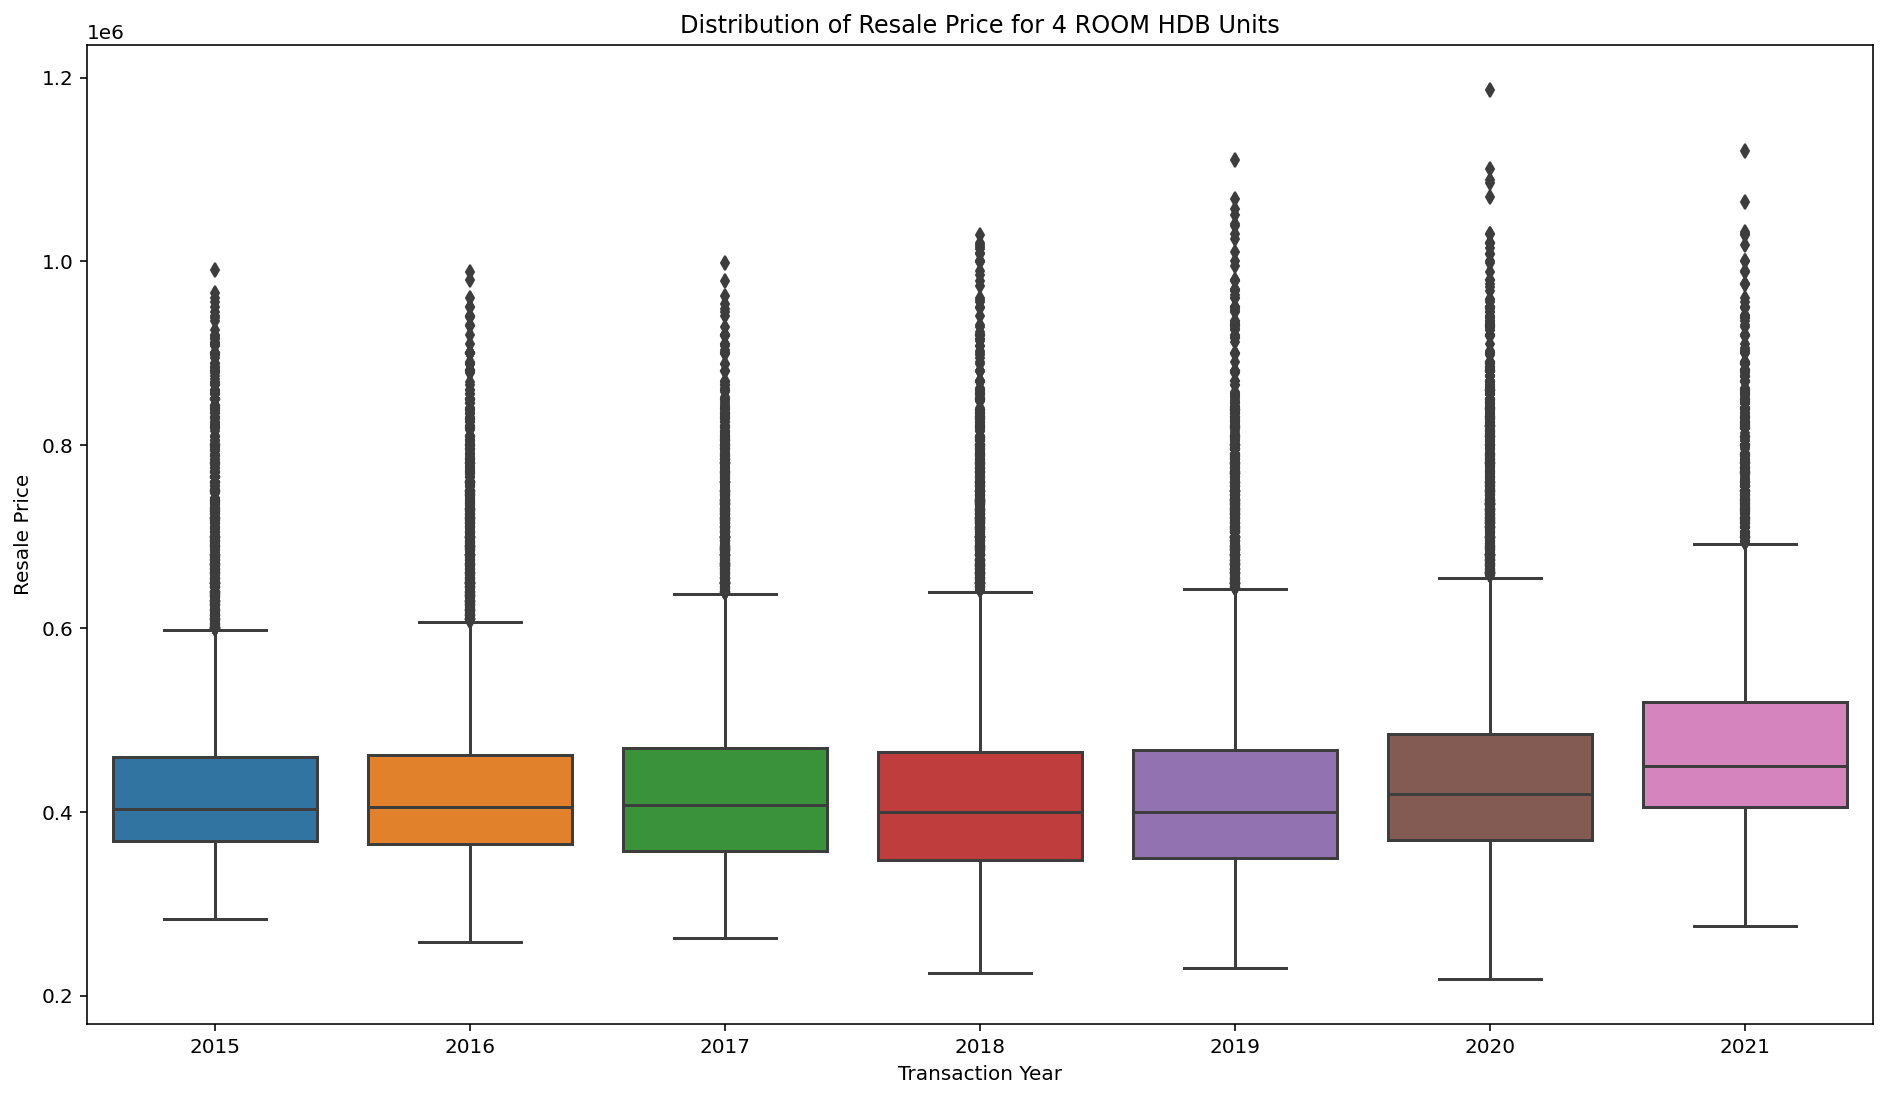

In [34]:
import seaborn as sns

sns.boxplot(x='Tranc_Year', y='resale_price', data=df_filtered[df_filtered['flat_type'] == '4 ROOM'])
plt.xlabel('Transaction Year')
plt.ylabel('Resale Price')
plt.title('Distribution of Resale Price for 4 ROOM HDB Units')
plt.show()


---

# Modeling with Linear Regression

![ml_workflow](https://i.imgur.com/xf43rGO.png)

## Model Selection

In [37]:
# These are common modules to import regardless the model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import metrics

In [38]:
features = ['Tranc_Year', 'floor_area_sqft', 'flat_type_numerized']
target = 'resale_price'

## Separating Train and Test Data sets

In [39]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(df[features], df[target], test_size=0.2, random_state=255)

![ml_coresteps](https://i.imgur.com/zmxg7Un.png)

### Key Step 1: Instantiate the Model

In [40]:
# Import the sepcifc model type
from sklearn import linear_model

m1 = linear_model.LinearRegression()

### Key Step 2: Train the Model

In [41]:
m1.fit(x_train, y_train)

LinearRegression()

### Key Step 3: Predict based on new inputs

In [42]:
predictions = m1.predict(x_test)

### Key Step 4 (New): Validate the the Predicted Values

In [43]:
mse = metrics.mean_squared_error(predictions, y_test) # <- y_test is the actual values
rmse = np.sqrt(mse)

print("About 95% of these predictions are between -" + str(np.round(2 * rmse, 2)) + " and " + str(np.round(2 * rmse, 2))
      + "of actual resale values")

About 95% of these predictions are between -211459.21 and 211459.21of actual resale values


### Key 5 (New): Understand the Predictors

This allow you to find what which are the more important features that contribute to the target (i.e. resale_price).

In many cases, you care less about the predictions, but more about which are the factors are more important, so you can prioritize or explain the phenomenon.

In [44]:
coeffecients = pd.DataFrame(m1.coef_, features)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Tranc_Year,-1897.257939
floor_area_sqft,141.005447
flat_type_numerized,64568.136336


Interpreting the coefficients:

⚠ Fill in the values in placeholders <..> below

- Holding all other features fixed, a 1 unit increase in **Tranc_Year** is associated with an **increase of <..> resale_price**.
- Holding all other features fixed, a 1 unit increase in **floor_area_sqft** is associated with an **increase of <..> resale_price**.
- Holding all other features fixed, a 1 unit increase in **flat_type_numerized** is associated with an **increase of <..> resale_price**.


# Example of Model Deployment

> Don't worry about understand the codes in this section.\
This subsection is meant for be a simple demo of a 'deployed' machine learning model \
Use 'Shift' + 'Enter' to run through the cells and see the output

In [45]:
# Only execute once
!pip install panel

In [46]:
import panel as pn
pn.extension()

In [47]:
from panel import widgets

In [48]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [49]:
def plot_prediction(Tranc_Year, floor_area_sqft, flat_type_numerized, predicted, df):
    fig = plt.figure()
    ax = fig.subplots()
    #ax.bar(['Tranc_Year', 'floor_area_sqft', 'flat_type_numerized'], (Tranc_Year, floor_area_sqft, flat_type_numerized))

    dft = df[df['flat_type_numerized'] == flat_type_numerized]
    ax.hist(dft['resale_price'],bins=25)

    #ax2 = ax.twinx()

    ax.text(predicted, 800, "{:.1f}".format(predicted), fontsize=20, va='center', ha='center');
    ax.axvline(predicted, c='orange');
    return fig


def predict_resale_price(Tranc_Year, floor_area_sqft, flat_type_numerized, view_fn=plot_prediction):
    predicted = m1.predict([(Tranc_Year, floor_area_sqft, flat_type_numerized)])[0]
    return plot_prediction(Tranc_Year, floor_area_sqft, flat_type_numerized, predicted, df);

In [50]:
df.floor_area_sqft.describe()

count    185968.000000
mean       1046.063698
std         263.133605
min         333.680900
25%         807.292500
50%        1022.570500
75%        1205.556800
max        3013.892000
Name: floor_area_sqft, dtype: float64

/Users/isaacxiao/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Column
    [0] Column
        [0] IntSlider(end=2022, start=2015, value=2021)
        [1] IntSlider(end=1500, start=400, step=50, value=700)
        [2] IntSlider(end=7, start=1, value=4)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00104')
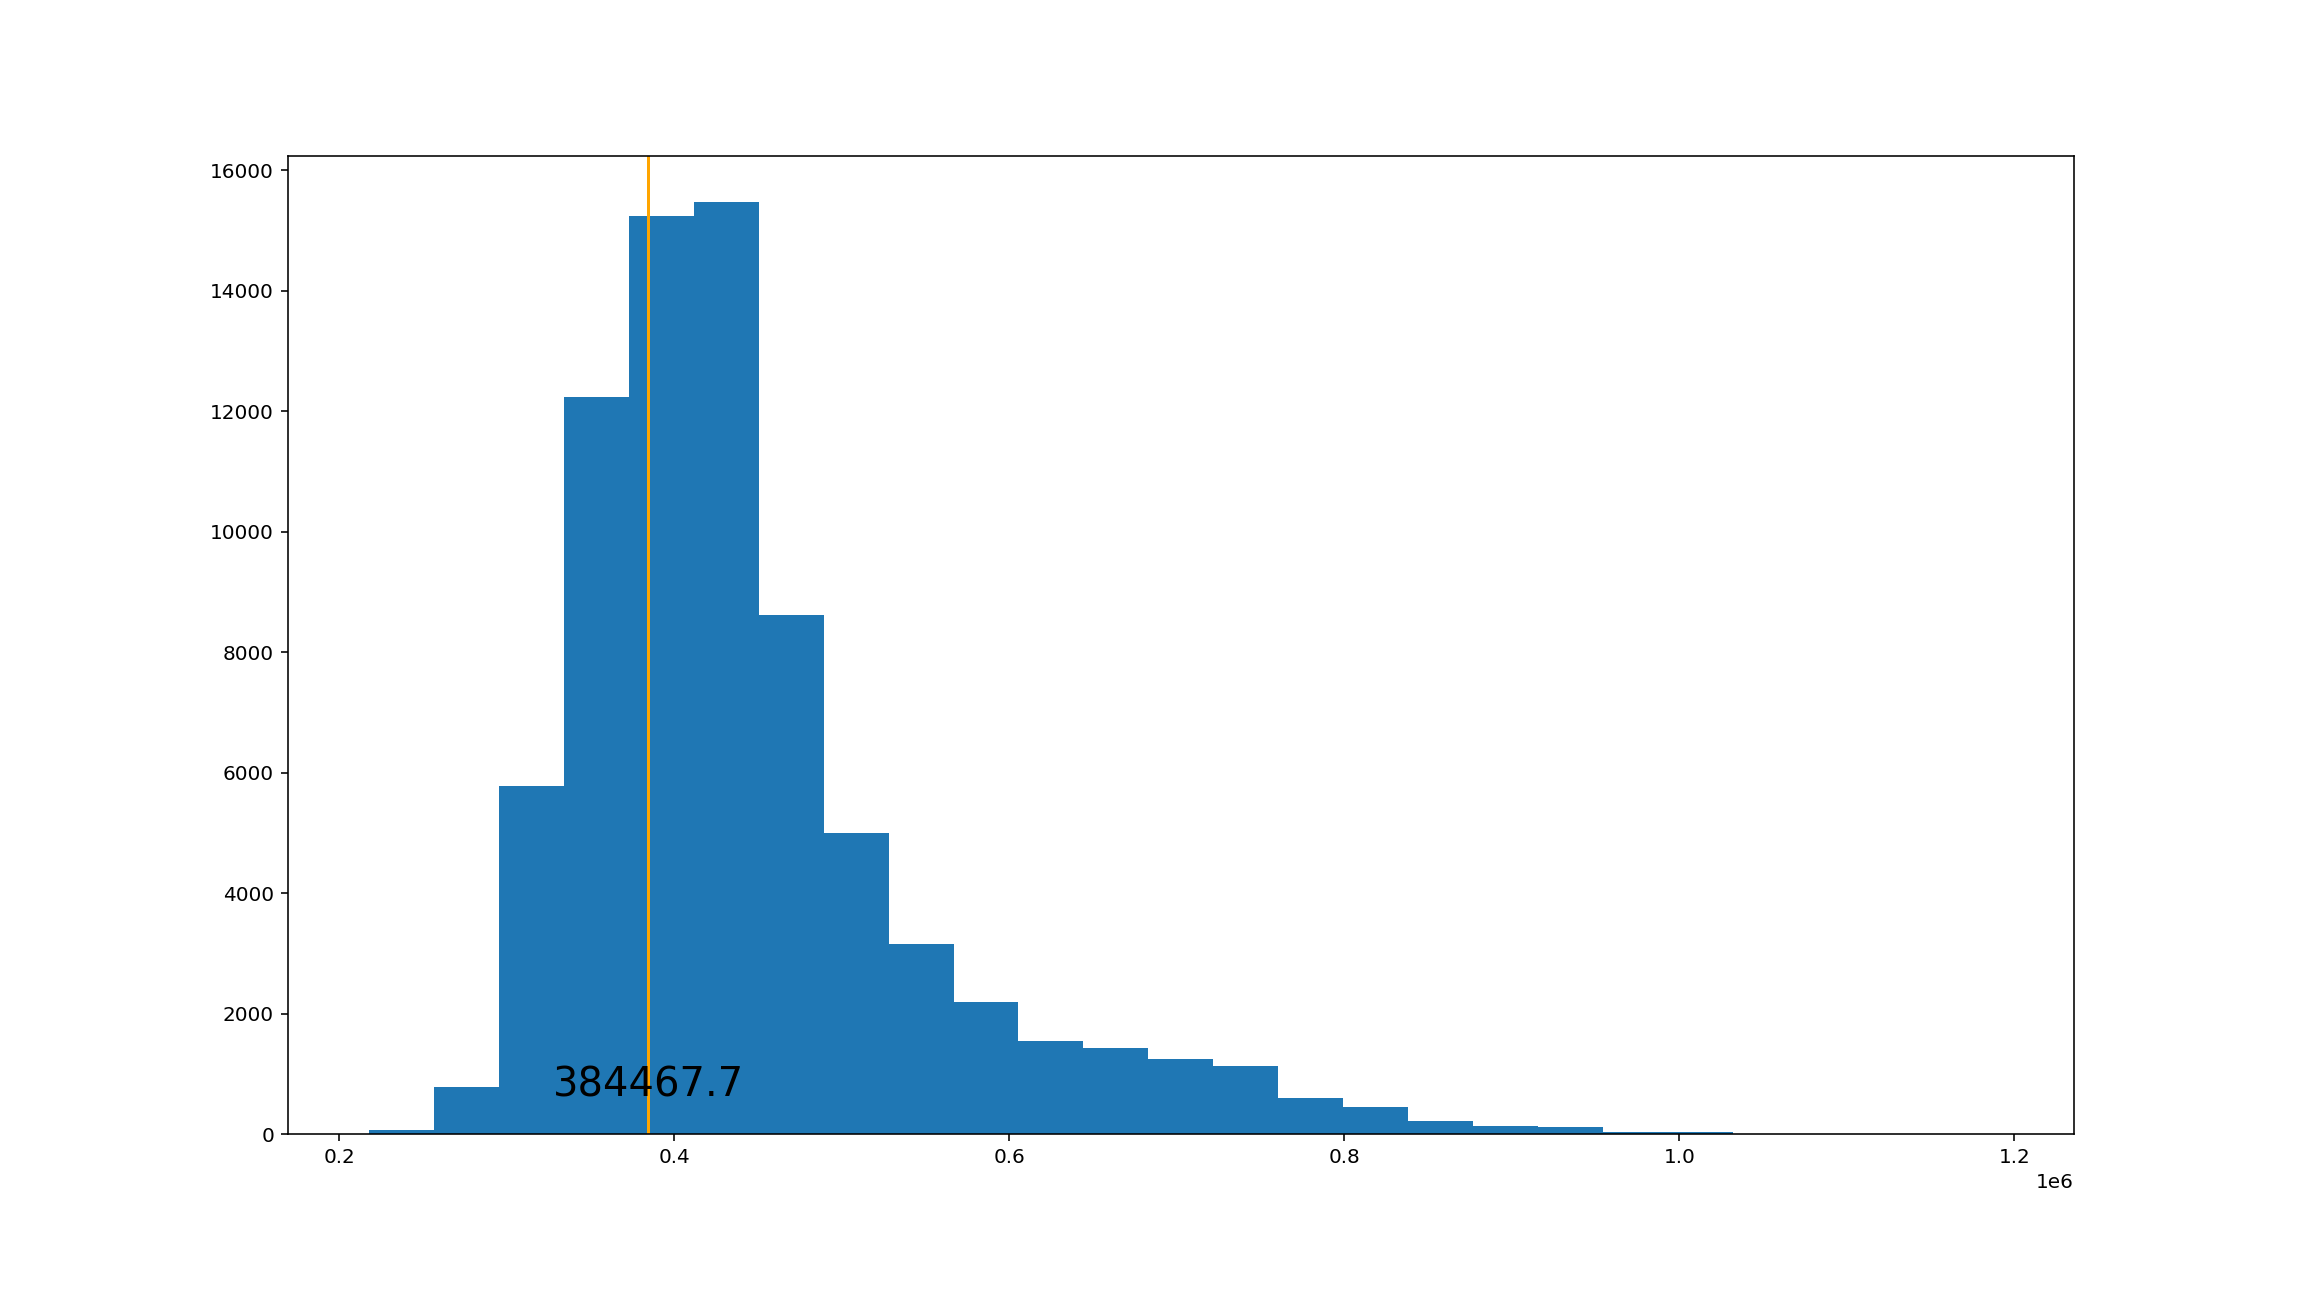

<Figure size 2304x1296 with 0 Axes>

In [51]:
pn.interact(predict_resale_price,
            Tranc_Year=widgets.IntSlider(start=2015, end=2022, step=1, value=2021),
            floor_area_sqft=widgets.IntSlider(start=400, end=1500, step=50, value=700),
            flat_type_numerized=widgets.IntSlider(start=1, end=7, step=1, value=4),
)

plt.clf()

---

# More Hands-on Practices: Build More Models

## Model B

🔷**TASK**

Train and Test a new Linear Regression model with more features.

In [ ]:
# replace all the missing values in the df dataframe with 0
df = <..>

In [52]:
df = df.fillna(0)

In [53]:
# These are the features from previous model
features = ['Tranc_Year', 'floor_area_sqft', 'flat_type_numerized']
target = 'resale_price'

In [54]:
# Train a new model with these additional features
features_additional = [
 'Mall_Nearest_Distance',
 'Mall_Within_1km',
 'Hawker_Nearest_Distance',
 'Hawker_Within_1km',
]

In [55]:
features.extend(features_additional)
target = 'resale_price'

In [ ]:
# Make sure you use random_state=255 so we can have the same result
# Use 80% of the data for training and 20% for testing
x_train, x_test, y_train, y_test = model_selection.train_test_split(<..>)

In [56]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(df[features], df[target], test_size=0.2, random_state=255)

In [ ]:
# Instantiate a Linear Regression Model and assign to the "m1" variable (no hyperparameter needed)
m2 = <..>

# Train the model
m2.fit(<..>)

# Use the trained model to generate predictions based on the test data
predictions = m2.predict(<..>)

# Validate the model
mse = metrics.mean_squared_error(predictions, y_test)
rmse = np.sqrt(mse)

print("About 95% of these predictions are between -" + str(np.round(2 * rmse, 2)) + " and " + str(np.round(2 * rmse, 2))
      + " cm of actual values")

In [57]:
m2 = linear_model.LinearRegression()
m2.fit(x_train, y_train)
predictions = m2.predict(x_test)
mse = metrics.mean_squared_error(predictions, y_test)
rmse = np.sqrt(mse)

print("About 95% of these predictions are between -" + str(np.round(2 * rmse, 2)) + " and " + str(np.round(2 * rmse, 2))
      + " of actual values")

LinearRegression()

About 95% of these predictions are between -190219.46 and 190219.46 of actual values


In [ ]:
# Understand the Predictors
<..>

In [58]:
coefficients = pd.DataFrame(m2.coef_, features)
coefficients.columns = ['Coefficient']
coefficients

,Coefficient
Tranc_Year,-1568.876546
floor_area_sqft,190.308500
flat_type_numerized,67690.247197
Mall_Nearest_Distance,-12.660682
Mall_Within_1km,885.194182
Hawker_Nearest_Distance,2.803241
Hawker_Within_1km,30233.995488


---

## Model C

🔷**TASK**

Train and Test a new Linear Regression model with the same features, with the following requirements:
- Use all records before 2021 to predict those records of 2021
- In other words, you will be training your model with records from 2015 to 2020, to predict records from 2021.

Pay attention to the comments started **#** with for further requirements

---

In [ ]:
df_test = <..> #Records from 2021
df_train = <..> # Records from 2015 to 2020

In [59]:
# Split the dataset into training and testing dataframes
df_train = df[df['Tranc_Year'] < 2021]  # Records from 2015 to 2020
df_test = df[df['Tranc_Year'] == 2021]  # Records from 2021

In [60]:
df_test = df[df['Tranc_Year'] == 2021]
df_train = df[df['Tranc_Year'] < 2021]

In [61]:
# Do not change this cell.
# Must execute this cell.
df_train = df_train.sample(len(df_train), random_state=255) # Shuffle the order of records in df_train

---

🔷**TASK**

Split the df_train and df_test into the required variables **x_train, y_train, x_test, y_test** to build the model

In [ ]:

x_train = <..>
y_train = <..>
x_test = <..>
y_test = <..>

In [62]:
x_train = df_train[['Tranc_Year','floor_area_sqft','flat_type_numerized','Mall_Nearest_Distance','Mall_Within_1km',
                    'Hawker_Nearest_Distance','Hawker_Within_1km']]

y_train = df_train['resale_price']

x_test = df_test[['Tranc_Year','floor_area_sqft','flat_type_numerized','Mall_Nearest_Distance','Mall_Within_1km',
                  'Hawker_Nearest_Distance','Hawker_Within_1km']]

y_test = df_test['resale_price']

---

In [ ]:
# Instantiate a Linear Regression Model and assign to the "m1" variable (no hyperparameter needed)
m2 = <..>

# Train the model
m2.fit(<..>)

# Use the trained model to generate predictions based on the test data
predictions = m2.predict(<..>)

# Validate the model
mse = metrics.mean_squared_error(predictions, y_test)
rmse = np.sqrt(mse)

print("About 95% of these predictions are between -" + str(np.round(2 * rmse, 2)) + " and " + str(np.round(2 * rmse, 2))
      + " cm of actual values")

In [63]:
# Instantiate a Linear Regression Model and assign to the "m1" variable (no hyperparameter needed)
m3 = linear_model.LinearRegression()

# Train the model
m3.fit(x_train, y_train)

# Use the trained model to generate predictions based on the test data
predictions = m3.predict(x_test)

# Validate the model
mse = metrics.mean_squared_error(predictions, y_test)
rmse = np.sqrt(mse)

print("About 95% of these predictions are between -" + str(np.round(2 * rmse, 2)) + " and " + str(np.round(2 * rmse, 2))
      + " cm of actual values")

LinearRegression()

About 95% of these predictions are between -253512.01 and 253512.01 cm of actual values


In [ ]:
# Understand the Predictors
<..>

In [65]:
# Understand the Predictors
coeffecients = pd.DataFrame(m3.coef_, features)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Tranc_Year,-3116.896342
floor_area_sqft,194.453045
flat_type_numerized,65942.439905
Mall_Nearest_Distance,-8.448179
Mall_Within_1km,1894.232305
Hawker_Nearest_Distance,2.557018
Hawker_Within_1km,29999.115660


---